## Glacier MB distribution plots inspired by Matthias Huss 
- overall idea: plot specific MB distributions and show that this year (2022) is an extreme melt year. Every vertical line represents the observation of one year
- the original idea is from Matthias Huss, I just replotted it for other glaciers and added some new ideas inside
    - original post from Matthias Huss: https://twitter.com/matthias_huss/status/1575539821493293058



---

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import cm
import scipy
from scipy.stats import norm
plt.rcParams['savefig.dpi'] = 300
%matplotlib inline

**here we use the data for Hintereisferner and Kesselwandferner:**
- but the code should similarly work for other glaciers (with some tiny manual adjustments)

In [16]:
# load the data
spec_mb = pd.read_csv('spec_mb_hef_kwf_oct2022.csv', sep=';')
spec_mb.index = spec_mb['calender year']
# check if there are any missing columns and if yes drop them
spec_mb = spec_mb.dropna()

In [17]:
spec_mb

,hydrological year,calender year,HEF mass balance (kg/m�),KWF mass balance (kg/m�)
calender year,,,,
1953,1952/1953,1953,-540,-438
1954,1953/1954,1954,-286,-126
1955,1954/1955,1955,76,246
1956,1955/1956,1956,-275,291
1957,1956/1957,1957,-189,118
...,...,...,...,...
2018,2017/2018,2018,-1963,-1619
2019,2018/2019,2019,-680,-337
2020,2019/2020,2020,-970,-522


In [41]:
np.arange(-int(xlims_abs), int(xlims_abs)+0.01,1)

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

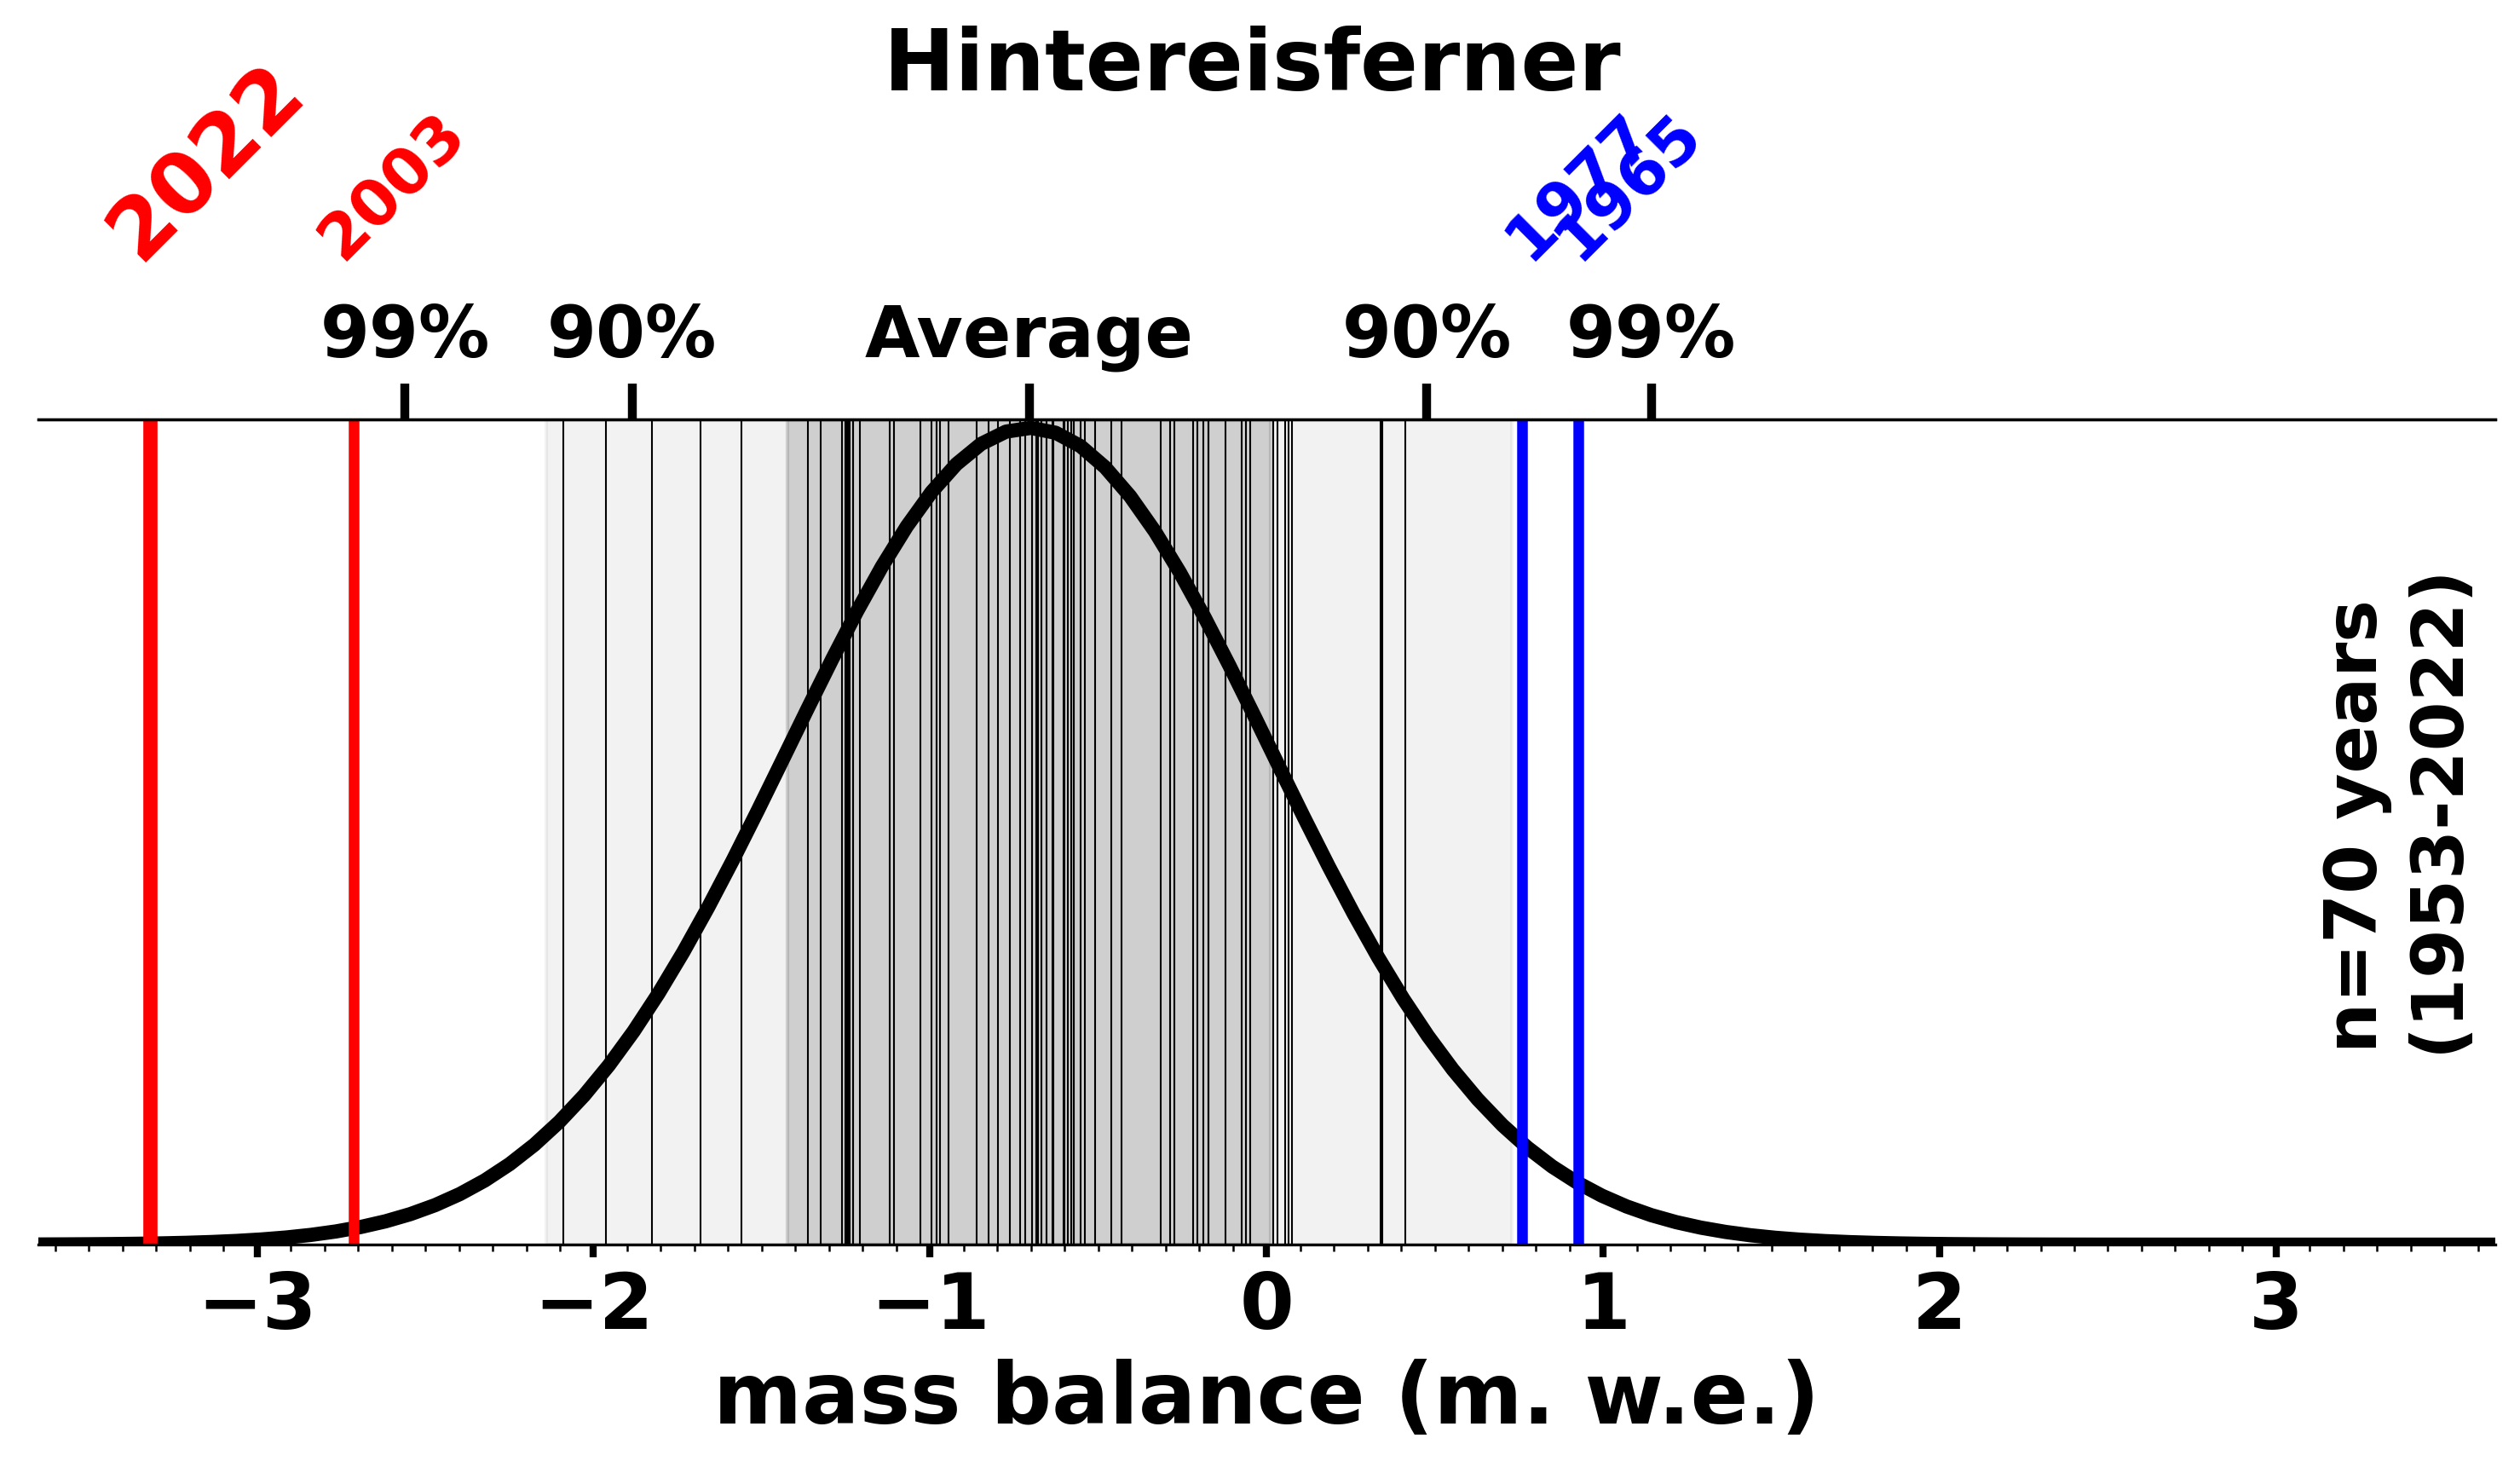

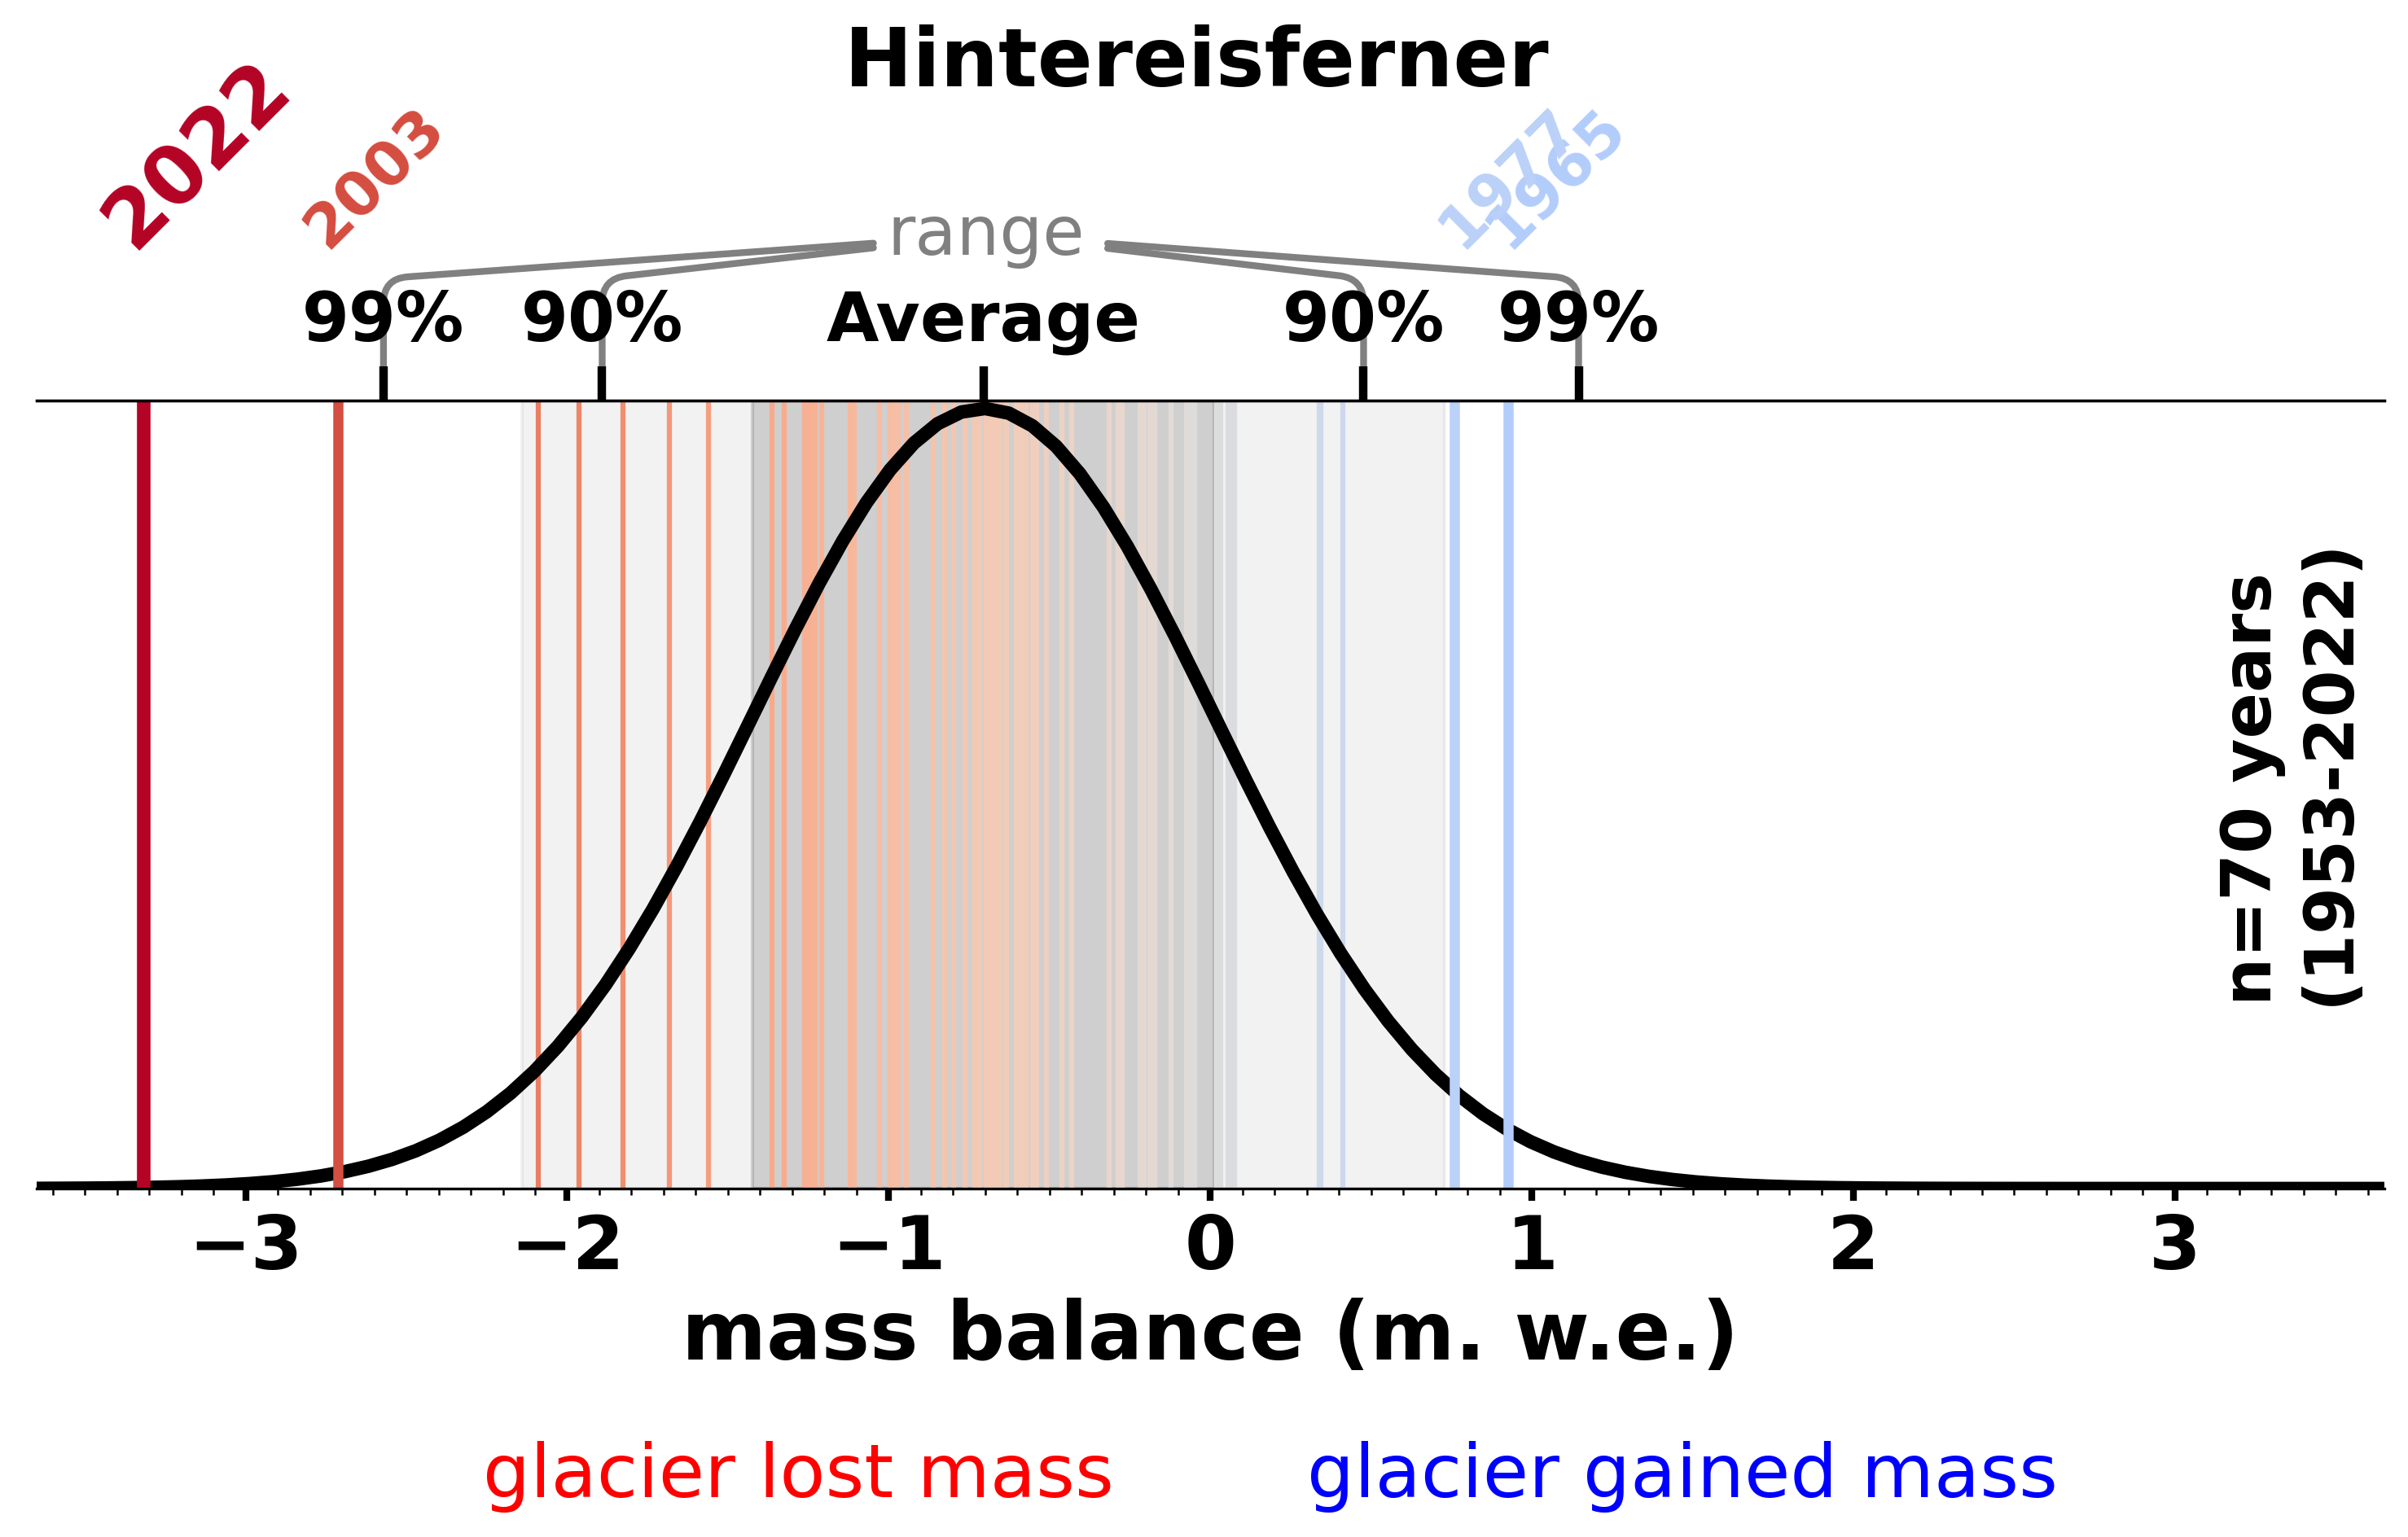

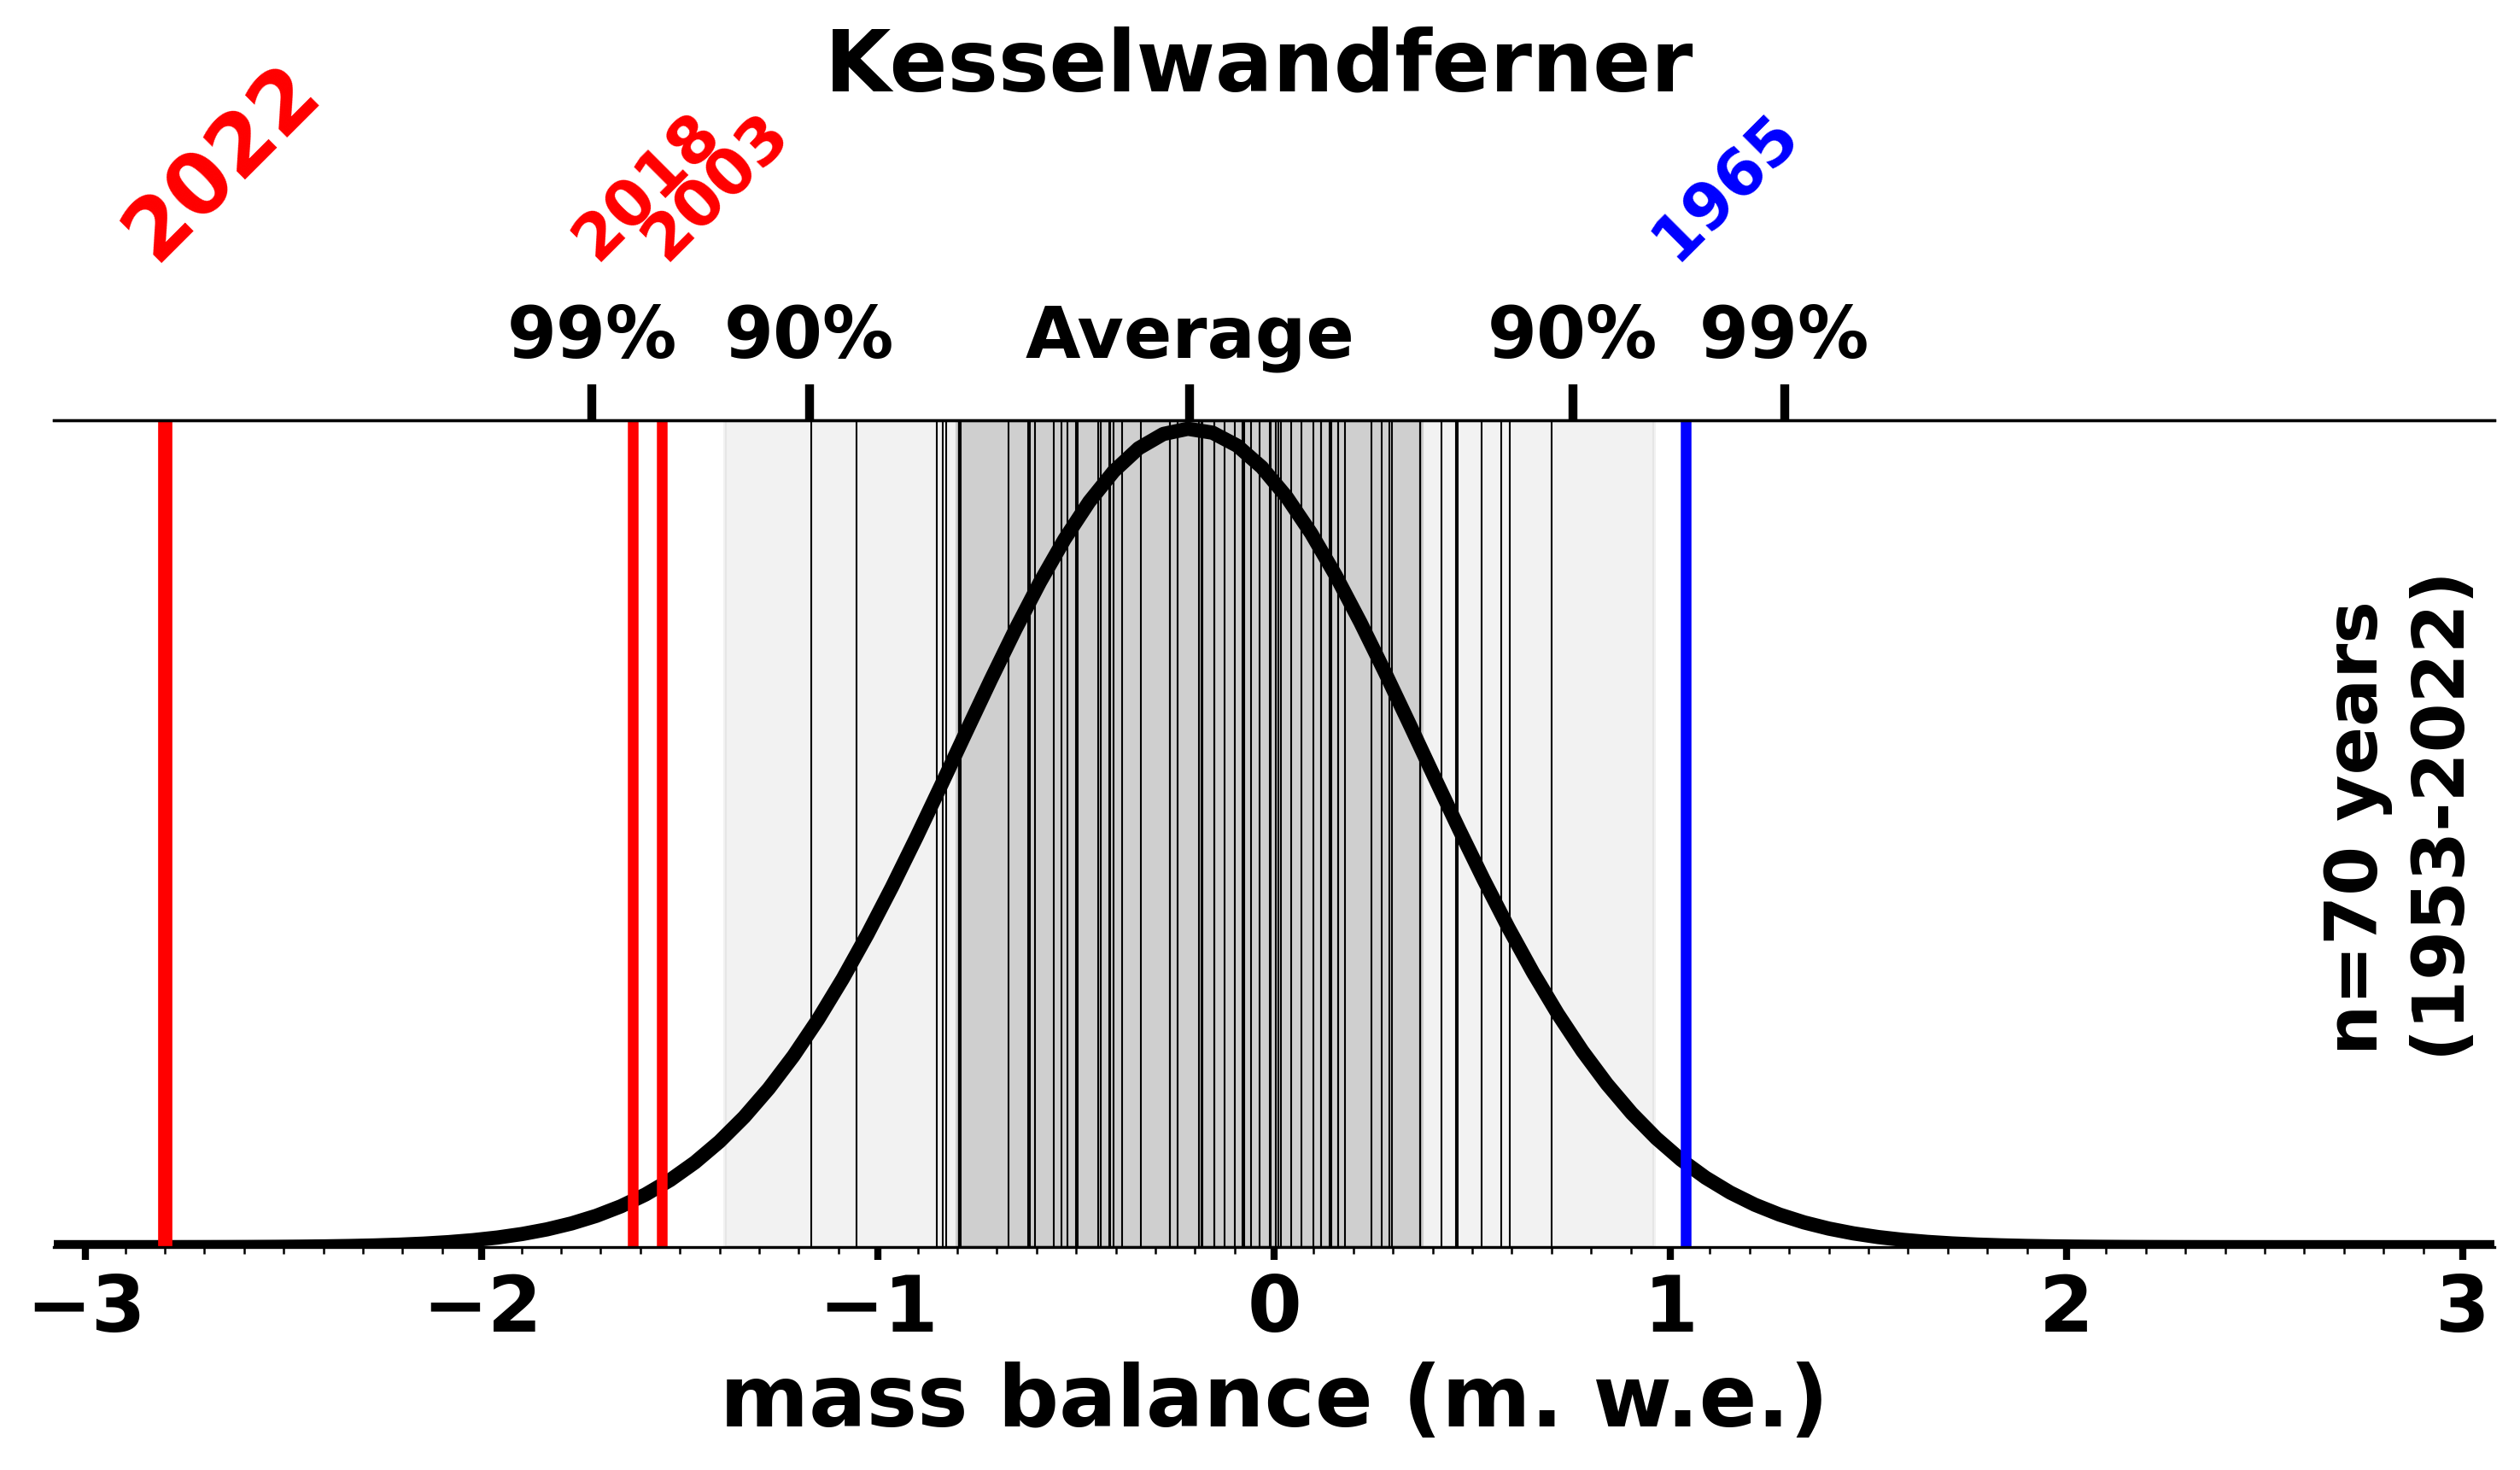

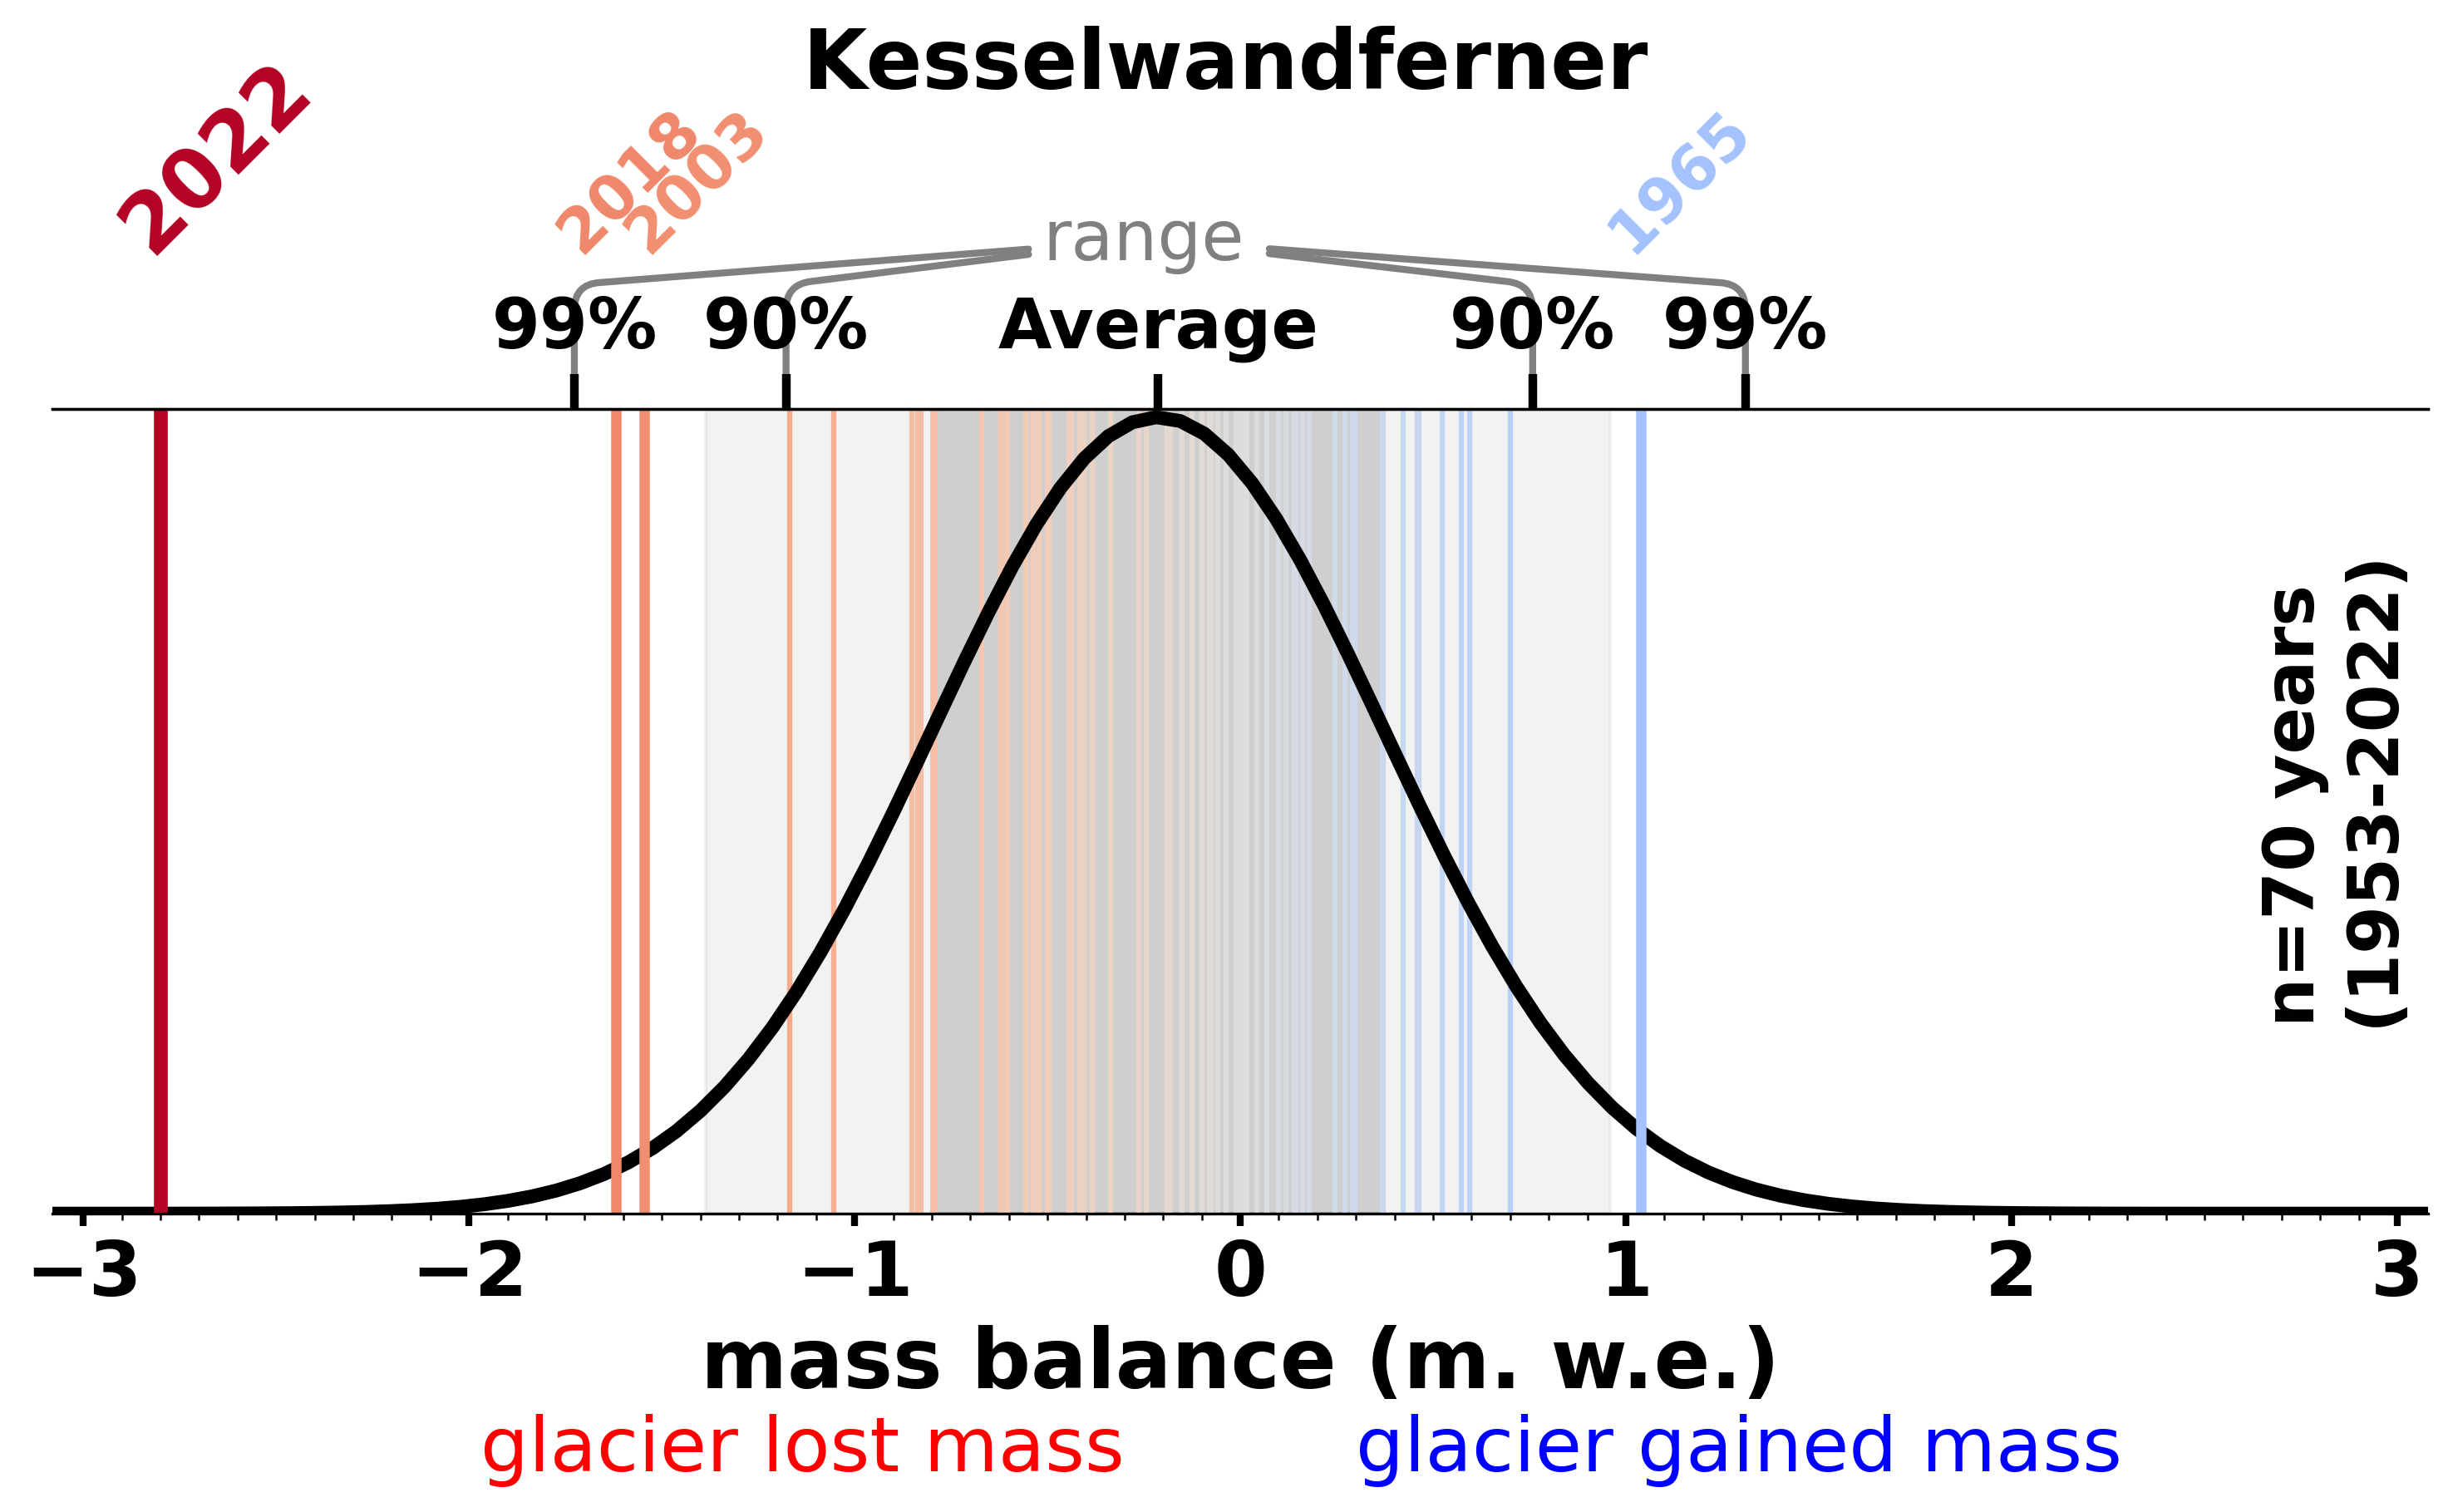

In [55]:
for glacier in ['Hintereisferner', 'Kesselwandferner']:
    for version in ['simple', 'advanced']:
        if glacier == 'Hintereisferner':
            spec_mb_values = spec_mb['HEF mass balance (kg/m�)']/1000  # convert to m w.e.
        elif glacier == 'Kesselwandferner':
            spec_mb_values = spec_mb['KWF mass balance (kg/m�)']/1000  # convert to m w.e.
            
        # get maximum specific mb and use them as limits for the plots and for the colormap scales 
        # we center the mass balance at 0, hence we just get the maximum absolute value 
        xlims_abs = np.max([np.absolute(spec_mb_values.max()),
                np.absolute(spec_mb_values.min())])*1.1
        if version == 'advanced':
            # for the blue-red colormap (only necessary for advanced version)
            # that is centered at MB = 0
            # normalize item number values to colormap
            # strongest color for the maximum absolute MB
            norm_col = matplotlib.colors.Normalize(vmin=-np.max([np.absolute(spec_mb_values.max()), 
                                                                 np.absolute(spec_mb_values.min())]),
                                                   vmax=np.max([np.absolute(spec_mb_values.max()), 
                                                                np.absolute(spec_mb_values.min())]))

        fig,_ = plt.subplots(1,1,figsize=(10,6))
        fig.set_dpi(300)

        # plot each year as vertical line 
        for j, yr in enumerate(spec_mb.index):
            if version == 'advanced':
                color =  cm.coolwarm_r(norm_col(spec_mb_values))[j]
                lw = 1.5
            else:
                color = 'black'
                lw = 0.5
            plt.axvline(spec_mb_values.loc[yr], color = color, lw=lw)

        plt.xlim([-xlims_abs, xlims_abs])

        # fit and plot the gaussian distribution (fitted from the observations)
        # get mean and std of the observed specific mb values
        mean, std = norm.fit(spec_mb_values)
        xmin, xmax = -xlims_abs,xlims_abs
        x = np.linspace(xmin, xmax, 100)
        y = norm.pdf(x, mean, std)
        plt.plot(x, y, lw=4, color='black')

        # check if a year is "extreme" (outside the mean +/- 2std or mean +/- 3 std)
        # if this is true, draw the vertical line bigger and in color (depending on if it is a positive or negative extreme)
        # horizontal displacement of year text
        for j,yr in enumerate(spec_mb.index):
            if glacier == 'Kesselwandferner':
                if yr==2018:
                    x_ch = 1.11
                else:
                    x_ch = 1.05
            else:
                x_ch = 1.05
            if spec_mb_values.loc[yr] < mean-3*std:
                if version == 'advanced':
                    color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                else:
                    color = 'red'
                ## very negative MB extremes in red
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=4)
                plt.text(spec_mb_values.loc[yr]*x_ch,y.max()+y.max()/4.8 ,f'{yr}', 
                         rotation=45, fontsize=24, fontweight='bold', color = color, zorder=2)
            elif spec_mb_values.loc[yr] < mean-2*std:
                if version == 'advanced':
                    color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                else:
                    color = 'red'
                ## negative MB extremes in red
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=3)

                plt.text(spec_mb_values.loc[yr]*x_ch,y.max()+y.max()/4.8 ,f'{yr}', #%': year {spec_mb_values.index[0]}-{spec_mb_values.index[-1]}',
                         rotation=45, 
                         fontsize=18, fontweight='bold', color = color, zorder=2)
            elif spec_mb_values.loc[yr] > mean+2*std:
                if version == 'advanced':
                    color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                else:
                    color = 'blue'
                ## positive MB extremes 
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=3)
                plt.text(spec_mb_values.loc[yr]*0.89,
                         y.max()+y.max()/4.8 ,f'{yr}', 
                         rotation=45, 
                         fontsize=18, fontweight='bold', color = color, zorder=2)
            elif spec_mb_values.loc[yr] > mean+3*std:
                # does not occur for HEF and KWF, but maybe for other glaciers
                if version == 'advanced':
                    color = cm.coolwarm_r(norm_col(spec_mb_values))[j]
                else:
                    color = 'blue'
                ## positive MB extremes 
                plt.axvline(spec_mb_values.loc[yr], color = color, lw=4)
                plt.text(spec_mb_values.loc[yr]*0.89,
                         y.max()+y.max()/4.8 ,f'{yr}', 
                         rotation=45, 
                         fontsize=24, fontweight='bold', color = color, zorder=2)

        plt.xlabel('mass balance (m. w.e.)', fontsize=24, fontweight='bold')
        plt.title(f'{glacier} \n \n', fontsize=24, fontweight='bold')
        ax = plt.gca()
        ax.set_xticks(np.arange(-int(xlims_abs)-1, int(xlims_abs)+1.01,0.1), minor=True)
        plt.xticks(ticks=np.arange(-int(xlims_abs), int(xlims_abs)+0.01,1), fontsize=22, fontweight='bold')#, width=2)
        ax.tick_params(axis='x', which='major', labelsize=22, width=2) #,fontweight='bold') #, width=2.5, length=10)

        plt.xlim([-xlims_abs, xlims_abs])

        plt.text(0.93, 0.25,f'n={len(spec_mb_values)} years\n({spec_mb.index[0]}-{spec_mb.index[-1]})', 
                 rotation=90, transform=plt.gca().transAxes, fontsize=20, fontweight='bold')

        # create secondary axis and plot the quantiles 
        ax2 = ax.secondary_xaxis(location='top')
        # create random values and then compute the quantiles to get the 90% and 99%-range
        gauss_dis_random_vals=np.random.normal(loc=mean, scale=std, size=100000)
        q005,q05,q95,q995 = np.quantile(gauss_dis_random_vals, q=[0.005, 0.05,0.95,0.995])
        ax2.set_xticks([q005,q05,mean,q95,q995])
        ax2.set_xticklabels(labels= ['99%','90%',r'Average','90%','99%'] , fontweight='bold', fontsize=20)
        ax2.set_zorder(2)
        if version=='advanced':
            # draw the range line to make clearer that this represents the 99%-range & 90% range ...
            plt.annotate('range', xy=(q05, y.max()*1.01),
                        xytext=(mean-0.3, y.max()*1.18), fontsize=20,color='grey',
                        xycoords='data',
                          verticalalignment='bottom',
                         arrowprops={"arrowstyle":"-", "color":"gray", "connectionstyle":"arc,angleA=0,angleB=90,armA=0,armB=150,rad=30", "lw":2},
                        zorder=1) 
            plt.annotate('range', xy=(q95, y.max()*1.01), alpha=0,
                        xytext=(mean-0.27, y.max()*1.18), fontsize=20, 
                        xycoords='data',
                                                   verticalalignment='bottom',
                         arrowprops={"arrowstyle":"-", "color":"gray", "connectionstyle":"arc,angleA=0,angleB=90,armA=0,armB=150,rad=30", "lw":2},
                        zorder=1) 

            plt.annotate('range', xy=(q005, y.max()*1.01), alpha=0,
                        xytext=(mean-0.3, y.max()*1.18), fontsize=20,color='grey',
                        xycoords='data',
                         verticalalignment='bottom',
                         arrowprops={"arrowstyle":"-", "color":"gray",
                                     "connectionstyle":"arc,angleA=0,angleB=90,armA=0,armB=150,rad=30", "lw":2},
                        zorder=1) 
            plt.annotate('range', xy=(q995, y.max()*1.01), alpha=0,
                        xytext=(mean-0.27, y.max()*1.18), fontsize=20, 
                                                   verticalalignment='bottom',
                        xycoords='data',
                         arrowprops={"arrowstyle":"-", "color":"gray", "connectionstyle":"arc,angleA=0,angleB=90,armA=0,armB=150,rad=30", "lw":2},
                        zorder=1) 

        # remove yticks
        plt.yticks(ticks=[])
        #remove yline axis
        ax.spines['left'].set_linewidth(0)
        ax.spines['right'].set_linewidth(0)
        # make sure that 0 "probability" is directly on the x-axis
        plt.ylim([0,y.max()*1.01])

        # make spans over mean +/-1std and mean +/-2std
        plt.axvspan(mean-std, mean+std, color='grey', alpha = 0.3)
        plt.axvspan(mean-2*std, mean+2*std, color='grey', alpha = 0.1)


        # set the parameters for both axis: label size in font points, the line tick line width and length in pixels
        ax2.tick_params(axis='x', which='major', labelsize=20, width=2.5, length=10)
        plt.tight_layout()

        if version == 'advanced':
            plt.text(0.3, y.min()-0.22,'glacier gained mass', color='blue', rotation=0, fontsize=22)
            plt.text(-0.3, y.min()-0.22,'glacier lost mass', color='red', rotation=0, fontsize=22, 
                     horizontalalignment='right')
        if glacier == 'Hintereisferner':
            plt.savefig(f'hef_mb_distributions_{version}.png', bbox_inches='tight')
            plt.savefig(f'hef_mb_distributions_{version}.pdf', bbox_inches='tight')

        elif glacier == 'Kesselwandferner':
            plt.savefig(f'kwf_mb_distributions_{version}.png', bbox_inches='tight') 
            plt.savefig(f'kwf_mb_distributions_{version}.pdf', bbox_inches='tight')

        

- in advanced version, the colors go from red (most negative) to blue (most positive), and have a neutral color in mb=0 


In [5]:
import seaborn as sns
sns.color_palette(cm.coolwarm_r(norm_col(np.sort(spec_mb_values.values[::3]))))

[(0.705673158, 0.01555616, 0.150232812),
 (0.9658988981882353, 0.7401418386039216, 0.6370577074156862),
 (0.9509556129803922, 0.7868750333333333, 0.7047606828039216),
 (0.9473454036, 0.7946955048, 0.7169905058),
 (0.940878943, 0.8055964028235294, 0.7351665564705883),
 (0.940878943, 0.8055964028235294, 0.7351665564705883),
 (0.9357737696666667, 0.8122367012392157, 0.7471564735843137),
 (0.933221183, 0.8155568504470588, 0.7531514321411764),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9226814526235294, 0.8285681381176471, 0.7770543897882353),
 (0.8995432066000001, 0.8475002359999999, 0.8177890744),
 (0.8995432066000001, 0.8475002359999999, 0.8177890744),
 (0.8918168921215687, 0.8519732770431372, 0.829085274254902),
 (0.8836871397764706, 0.8561077179529412, 0.8402576701764706),
 (0.8593850998705882, 0.8644309674588235, 0.8721105307882353),
 (0.8473649056117648, 0.8624724823764706, 0.8855404703647058),
 (0.839351442772549, 0.861166825654902, 0.8944937634156863),
 (0.8353447113529412, 0.8605139972941176, 0.8989704099411765),
 (0.8093286703529412, 0.8529739995529412, 0.9223225884705882),
 (0.7727059486039215, 0.8389782172392157, 0.9493187599137255),
 (0.7633627801019607, 0.8350922218196078, 0.9556576765568627),
 (0.7486824103137254, 0.8276791079411765, 0.9633344592745098),
 (0.7189852929803922, 0.811992893745098, 0.9776561613921568),
 (0.640827782372549, 0.7607515064117647, 0.9978457748823529)]